<a href="https://colab.research.google.com/github/gabitza-tech/iasi_lab_sr/blob/main/lab_iasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Few-Shot Speaker Recognition

Few-shot learning is a machine learning approach where a model is trained to perform tasks with only a small number of

---

labeled examples. Unlike traditional

---

models that require large amounts of data to learn, few-shot learning enables the model to generalize and make predictions from only a few training samples. This technique is particularly useful in scenarios where data is scarce, and it often involves using pre-trained models, transfer learning, or specialized algorithms designed to leverage minimal data. Few-shot learning is commonly applied in fields like natural language processing, computer vision, and robotics.

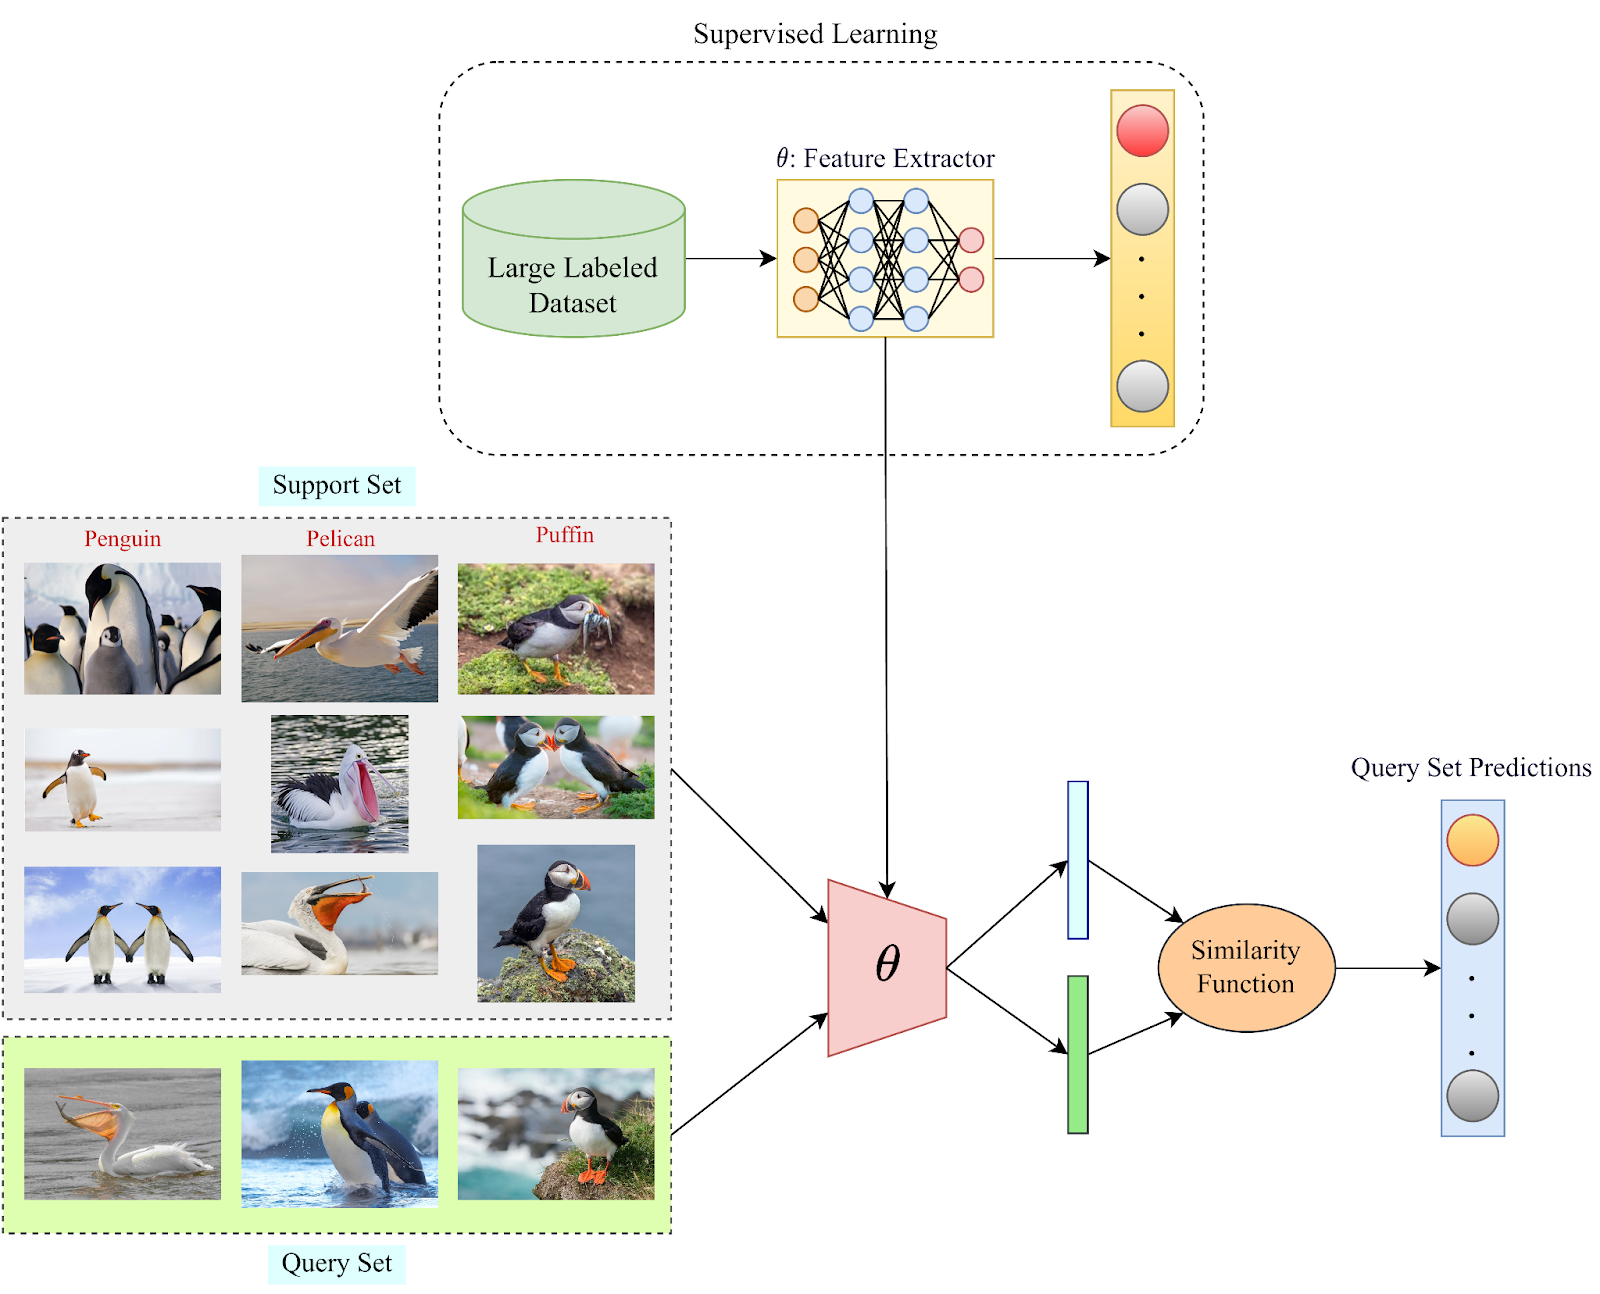







# Predicting the class based on Similarity between Query and Support

The **Cosine Similarity** formula is:

$$
\text{Cosine Similarity} = \frac{A \cdot B}{\|A\| \|B\|}
$$

The **Euclidean Distance** formula in 2D is:

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

For n-dimensional space, the Euclidean distance is:

$$
d = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$


# Step 1

In the first part of the lab, we will first try to analyze a couple of samples from two Speaker Recognition databases: VoxCeleb1 and JukeBox Singing.

You have inside inside the directory embeddings/ two .pkl format files. Load them using:

In [3]:
import numpy as np

dataset_file = '/content/jukebox_dev.pkl'
merged_dict = np.load(dataset_file,allow_pickle=True)

We load the .pkl file as a dictionary and we can analyze it.

In [7]:
for key in merged_dict.keys():
  print(f'Key: {key}')
  print(f'Length of {key} is {len(merged_dict[key])}.')
  print(merged_dict[key][:100])
  print('---')

Key: concat_labels
Length of concat_labels is 3439.
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3]
---
Key: concat_features
Length of concat_features is 3439.
[[-1.2213382   0.22816841 -1.1387533  ...  1.1900227   0.69100666
   0.97755843]
 [-1.3586781   0.3255885  -1.0633332  ...  1.3752825   0.8211191
   0.27719903]
 [-1.5833865   0.22537938 -1.1752241  ...  1.8129508   0.91189986
   0.16760235]
 ...
 [ 0.65603006 -0.5826989  -1.0777612  ... -0.13066901  0.270612
   0.7298425 ]
 [ 0.2787906  -0.7626581  -0.53670263 ...  0.36671206  0.50685465
   0.45883018]
 [ 0.1489958  -0.8873958  -0.8141708  ...  0.4536713   0.46052048
   0.1998317 ]]
---
Key: concat_audios
Length of concat_audios is 3439.
['/media/gabi/gabi_data/jukebox/ALL/1015/1

The dictionaries contain three lists:

'concat_features': the extracted embeddings from each audio file

'concat_labels': the label of each audio file

'concat_audios': the filepath of each audio file (we do not need it)

# Step 2

We will need to separate for each class the samples in a Query set and Support set.

NOTE: NO sample should be part of both the Query and Support set!

In [8]:
# All unique classes, 56 classes
uniq_classes = set(merged_dict['concat_labels'])
print(uniq_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55}


In [16]:
from sklearn.model_selection import train_test_split

# Convert lists to numpy arrays if needed for indexing
concat_labels = np.array(merged_dict['concat_labels'])
concat_features = np.array(merged_dict['concat_features'])
concat_audios = np.array(merged_dict['concat_audios'])

# Initialize empty lists to hold the support and query sets
support_labels = []
query_labels = []
support_features = []
query_features = []
support_audios = []
query_audios = []

# Get the unique classes in concat_labels
unique_classes = np.unique(concat_labels)

# Iterate over each class to split the data
for class_label in unique_classes:
    # Get the indices of the current class
    class_indices = np.where(concat_labels == class_label)[0]

    # Split the indices into 80% support and 20% query
    train_idx, test_idx = train_test_split(class_indices, test_size=0.2, random_state=42)

    # Add the support and query labels/features to the corresponding lists
    support_labels.extend(concat_labels[train_idx])
    query_labels.extend(concat_labels[test_idx])

    support_features.extend(concat_features[train_idx])
    query_features.extend(concat_features[test_idx])

    support_audios.extend(concat_audios[train_idx])
    query_audios.extend(concat_audios[test_idx])

# Convert the lists to numpy arrays
support_labels = np.array(support_labels)
query_labels = np.array(query_labels)
support_features = np.array(support_features)
query_features = np.array(query_features)

print(query_labels[12:16])
print(query_audios[12:16])


[0 0 1 1]
['/media/gabi/gabi_data/jukebox/ALL/1015/16_5.wav', '/media/gabi/gabi_data/jukebox/ALL/1015/11_1.wav', '/media/gabi/gabi_data/jukebox/ALL/1026/1_3.wav', '/media/gabi/gabi_data/jukebox/ALL/1026/1_5.wav']


**Few-Shot Concepts**

Some important concepts in the Few-Shot literature are:

* The number of shots (denoted usually as **K-shots**): the number of samples inside each class from the support.
* The number of ways (**n-ways**): the number of different classes inside the Support Set at inference time.
* The number of query samples (**n_q**): the number of samples inside the Query Set at inference time.
* The number of tasks (**n_tasks**): number of independent inference steps made, for each task, we sample a different support

*Inductive Few-Shot*

Inductive few-shot implies that each predictions is done on a single sample at a time, and all the other samples inside the Query Set do not influence the results. The most classical approach seen in Machine Learning in general.

*Transductive Few-Shot*


It's a special case that often appears in practical scenario where multiple query samples are received at inference time and the prediction is made using the whole query set as input, leveraging the statistical distribution of the whole Query set instead of a single sample.



**TASK GENERATOR**

We will create a class Task_generator that samples different query and support sets automatically for several tasks, taking as input only the dictionary.

**OUR PROBLEM**

We want to predict the identity of a person that we have not trained on, based on the Support Set.

Each time our Query Set will consist of a single class. (the person we want to identify) We will see how inductive vs transductive methods influence the result.

In [23]:
import torch
import numpy as np
import random
import torch
import numpy as np
import random

def find_matching_positions(list1, list2):
    set_list2 = set(map(tuple, list2))
    matching_positions = [i for i, vector in enumerate(list1) if tuple(vector) in set_list2]
    return matching_positions

def set_seed(seed):
    random.seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)

class Tasks_Generator:
    def __init__(self, uniq_classes, n_tasks=1, n_ways=1251, n_ways_eff=1, n_query=1, k_shot=1, seed="42"):
        """
        uniq_classes: all labels of classes in the support set [List]
        n_tasks: number of generated tasks
        n_ways: number of sampled classes in the support (number of support classes)
        n_ways_eff: number of sampled classes in the query, are part of the support classes (closed set) and much fewer (number of query classes)
        n_query: number of samples per query class
        k_shot: number of samples per support class
        """
        self.uniq_classes=sorted(uniq_classes)
        # Convert all class ids to integer values.

        self.n_tasks = n_tasks
        self.n_ways= n_ways
        self.n_ways_eff = n_ways_eff
        self.n_query = n_query
        self.k_shot = k_shot
        self.seed = seed

        set_seed(self.seed)

        self.support_classes = []
        self.query_classes = []

        for i in range(n_tasks):
            sampled_classes=sorted(random.sample(self.uniq_classes, n_ways))
            self.support_classes.append(sampled_classes)
            # Query classes must be part of the sampled support classes
            self.query_classes.append(sorted(random.sample(sampled_classes, n_ways_eff)))

    def sampler(self, data_dict, mode):
        """
        Every time I sample, I set the seed.. sometimes it doesn't pick the same samples
        when I use the sampler second time with a different batch size.

        Setting the seed everytime removes this problem

        There are 2 modes: query and support. Depending on the mode, we either load the sampled support/query classes for n_tasks
        """
        out_embs = []
        out_labels = []
        out_slices = []

        if mode == "support":
            tasks_classes = self.support_classes
            no_samples = self.k_shot
        else:
            tasks_classes = self.query_classes
            no_samples = self.n_query


        for task, sampled_classes in tqdm(enumerate(tasks_classes)):

            # Get indices of samples that are part of the sampled classes in the support for this task.
            # The query must use the same indices as the support!
            self.label_dict = {label:i for i,label in enumerate(self.support_classes[task])}

            # Get the indices where elements in concat_labels are in sampled_classes
            data_label_indices = np.where(np.isin(np.array(data_dict['concat_labels']), sampled_classes))[0].tolist()

            all_labels = np.asarray(data_dict['concat_labels'])[data_label_indices]
            all_slices = np.asarray(data_dict['concat_audios'])[data_label_indices]
            all_embs = np.asarray(data_dict['concat_features'])[data_label_indices]

            combined_array = np.column_stack((all_labels, all_slices))
            unique_pairs, inverse_indices = np.unique(combined_array, axis=0, return_inverse=True)

            random_pairs = [(label, np.random.choice(unique_pairs[unique_pairs[:, 0] == str(label), 1], size=no_samples, replace=False)) for label in sorted(sampled_classes)]
            random_pairs_array = np.concatenate([[[label, id_] for id_ in ids] for label, ids in random_pairs])

            data_indices = np.array(find_matching_positions(combined_array, random_pairs_array))

            data_embs = all_embs[data_indices]
            data_labels = all_labels[data_indices]
            data_labels = np.asarray([self.label_dict[label] for label in data_labels])

            data_slices = all_slices[data_indices]

            out_embs.append(data_embs)
            out_labels.append(data_labels)
            out_slices.append(data_slices)

            #print("Sampled classes: "+str([self.label_dict[label] for label in sampled_classes]))
            #print("Labels: " + str(data_labels))

        out_embs = np.array(out_embs)
        out_labels = np.array(out_labels)
        out_slices = np.array(out_slices)

        return out_embs, out_labels, out_slices

    def sampler_unified(self, data_dict):
        """
        Every time I sample, I set the seed.. sometimes it doesn't pick the same samples
        when I use the sampler second time with a different batch size.

        Setting the seed everytime removes this problem
        """
        #set_seed(self.seed)
        """
        There are 2 modes: query and support. Depending on the mode, we either load the sampled support/query classes for n_tasks
        """
        support_embs = []
        support_labels = []
        support_slices = []
        support_embs2 = []
        support_labels2 = []
        support_slices2 = []
        query_embs = []
        query_labels = []
        query_slices = []

        only_support_classes = [[x for x in self.support_classes[task] if x not in self.query_classes[task]] for task,sup_classes in enumerate(self.support_classes)]

        for task, sampled_classes in tqdm(enumerate(only_support_classes)):
            # Get indices of samples that are part of the sampled classes in the support for this task.
            # The query must use the same indices as the support!
            self.label_dict = {label:i for i,label in enumerate(self.support_classes[task])}
            # Get the indices where elements in concat_labels are in sampled_classes
            data_label_indices = np.where(np.isin(np.array(data_dict['concat_labels']), sampled_classes))[0].tolist()

            all_labels = np.asarray(data_dict['concat_labels'])[data_label_indices]
            all_slices = np.asarray(data_dict['concat_audios'])[data_label_indices]
            all_embs = np.asarray(data_dict['concat_features'])[data_label_indices]

            combined_array = np.column_stack((all_labels, all_slices))
            unique_pairs, inverse_indices = np.unique(combined_array, axis=0, return_inverse=True)

            random_pairs = [(label, np.random.choice(unique_pairs[unique_pairs[:, 0] == str(label), 1], size=self.k_shot, replace=False)) for label in sorted(sampled_classes)]
            random_pairs_array = np.concatenate([[[label, id_] for id_ in ids] for label, ids in random_pairs])

            data_indices = np.array(find_matching_positions(combined_array, random_pairs_array))

            data_embs = all_embs[data_indices]
            data_labels = all_labels[data_indices]
            data_labels = np.asarray([self.label_dict[label] for label in data_labels])

            data_slices = all_slices[data_indices]

            support_embs.append(data_embs)
            support_labels.append(data_labels)
            support_slices.append(data_slices)

        for task, sampled_classes in tqdm(enumerate(self.query_classes)):


            # Get indices of samples that are part of the sampled classes in the support for this task.
            # The query must use the same indices as the support!
            self.label_dict = {label:i for i,label in enumerate(self.support_classes[task])}
            # Get the indices where elements in concat_labels are in sampled_classes
            data_label_indices = np.where(np.isin(np.array(data_dict['concat_labels']), sampled_classes))[0].tolist()

            all_labels = np.asarray(data_dict['concat_labels'])[data_label_indices]
            all_slices = np.asarray(data_dict['concat_audios'])[data_label_indices]
            all_embs = np.asarray(data_dict['concat_features'])[data_label_indices]

            combined_array = np.column_stack((all_labels, all_slices))
            unique_pairs, inverse_indices = np.unique(combined_array, axis=0, return_inverse=True)

            random_pairs = [(label, np.random.choice(unique_pairs[unique_pairs[:, 0] == str(label), 1], size=(self.k_shot+self.n_query), replace=False)) for label in sorted(sampled_classes)]
            random_pairs_array = np.concatenate([[[label, id_] for id_ in ids] for label, ids in random_pairs])

            data_indices = np.array(find_matching_positions(combined_array, random_pairs_array))

            data_embs = all_embs[data_indices]
            data_labels = all_labels[data_indices]
            data_labels = np.asarray([self.label_dict[label] for label in data_labels])

            data_slices = all_slices[data_indices]

            class_s_embs2 =[]
            class_s_labels2 =[]
            class_s_slices2 =[]
            class_q_embs2 =[]
            class_q_labels2 =[]
            class_q_slices2 =[]
            for label in self.query_classes[task]:
                label = self.label_dict[label]
                indices = np.where(data_labels == label)

                class_s_embs2.extend(data_embs[indices][:self.k_shot])
                class_s_labels2.extend(data_labels[indices][:self.k_shot])
                class_s_slices2.extend(data_slices[indices][:self.k_shot])

                class_q_embs2.extend(data_embs[indices][self.k_shot:])
                class_q_labels2.extend(data_labels[indices][self.k_shot:])
                class_q_slices2.extend(data_slices[indices][self.k_shot:])

            support_embs2.append(class_s_embs2)
            support_labels2.append(class_s_labels2)
            support_slices2.append(class_s_slices2)
            query_embs.append(class_q_embs2)
            query_labels.append(class_q_labels2)
            query_slices.append(class_q_slices2)

        support_embs = np.array(support_embs)
        support_labels = np.array(support_labels)
        support_slices = np.array(support_slices)
        support_embs2 = np.array(support_embs2)
        support_labels2 = np.array(support_labels2)
        support_slices2 = np.array(support_slices2)

        support_embs = np.concatenate((support_embs,support_embs2),axis=1)
        support_labels = np.concatenate((support_labels,support_labels2),axis=1)
        support_slices = np.concatenate((support_slices,support_slices2),axis=1)

        query_embs = np.array(query_embs)
        query_labels = np.array(query_labels)
        query_slices = np.array(query_slices)

        return query_embs, query_labels, query_slices,support_embs,support_labels,support_slices

In [24]:
# function to normalize embeddings

def CL2N_embeddings(enroll_embs, test_embs, use_mean=True, use_std=False, eps=1e-10):

    all_embs = np.concatenate((enroll_embs,test_embs),axis=1)

    initial_shape = all_embs.copy().shape
    #if len(initial_shape) == 3:
    #    all_embs = all_embs.reshape((-1, all_embs.shape[-1]))

    if use_mean:
        all_embs = all_embs - np.expand_dims(all_embs.mean(axis=1),1)

    if use_std:
        all_embs = all_embs / (all_embs.std(axis=1) + eps)

    embs_l2_norm = np.expand_dims(np.linalg.norm(all_embs, ord=2, axis=-1), axis=-1)
    all_embs = all_embs / embs_l2_norm

    #if len(initial_shape) == 3:
    #    all_embs = all_embs.reshape(initial_shape)

    enroll_embs = all_embs[:,:enroll_embs.shape[1]]
    test_embs = all_embs[:,enroll_embs.shape[1]:]

    return enroll_embs,test_embs

In [27]:
# Generate independent tasks
from tqdm import tqdm
uniq_classes = sorted(list(set(merged_dict['concat_labels'])))

n_tasks = 100
n_ways = len(uniq_classes)
n_ways_eff = 1
n_query = 1
k_shot = 3
seed = 42
normalize = True

task_generator = Tasks_Generator(uniq_classes=uniq_classes,                                                n_tasks=n_tasks,
                                                n_ways= n_ways,
                                                n_ways_eff=n_ways_eff,
                                                n_query=n_query,
                                                k_shot=k_shot,
                                                seed=seed)

test_embs, test_labels, test_audios, enroll_embs, enroll_labels, enroll_audios = task_generator.sampler_unified(merged_dict)

100it [00:02, 49.47it/s]
100it [00:00, 487.93it/s]


In [29]:
if normalize:
  enroll_embs, test_embs = CL2N_embeddings(enroll_embs,test_embs,use_mean=False)

# We need to create the similarity functions

Now that we have created a set of tasks and splitted each class in a support and query set, we need to define a set of basic similarity functions in order to infer.

The first step we have to do, is to compute for each support class a centroid.

We will define 3 functions:

* Simpleshot (inductive): a simple but very efficient method that utilizes cosine or euclidian distance between each query sample and the centroids of the support set. For each sample, the results may differ.
* Simpleshot maj (transductive): we utilize SimpleShot on each sample then do majority voting to obtain the identity of the person
* Simpleshot centroid (transductive): we compute the centroid of the query set then compute the similarity metric between the centroid of the query and each support class


In [33]:
import os
import numpy as np
from tqdm import tqdm
import torch
import torch.nn.functional as F
import random

def majority_or_original(tensor):
    majority_labels = []
    for task in tensor:
        values, counts = task.unique(return_counts=True)
        max_count = counts.max().item()
        modes = values[counts == max_count]

        # If there's a tie (multiple modes), keep the original values for this task
        if len(modes) > 1:
            majority_labels.append(task)
        else:
            majority_labels.append(modes.repeat(len(task)))

    return torch.stack(majority_labels)

class Simpleshot():

    def __init__(self,avg="mean",backend="cosine", device='cpu', method="inductive"):
        self.avg = avg
        self.backend = backend
        self.device = torch.device(device)
        self.method = method

    def eval(self,enroll_embs,enroll_labels,test_embs,test_labels, test_audios):

        if self.method == "ss":
            pred_labels, pred_labels_5 = self.inductive(enroll_embs,enroll_labels,test_embs,test_labels)

        elif self.method == "smv":
            pred_labels, pred_labels_5 = self.inductive(enroll_embs,enroll_labels,test_embs,test_labels)
            pred_labels = majority_or_original(pred_labels)

        elif self.method == "sscd":
            pred_labels, pred_labels_5 = self.sscd(enroll_embs,enroll_labels,test_embs,test_labels)

        test_labels = torch.from_numpy(test_labels).long()

        acc_tasks = compute_acc(pred_labels, test_labels)
        acc_tasks_5 = compute_acc_5(pred_labels_5, test_labels)

        return acc_tasks, acc_tasks_5, pred_labels_5

    def calculate_centroids(self,enroll_embs,enroll_labels):
        # Returns [n_tasks,n_ways,192] tensor with the centroids
        # sampled_classes: [n_tasks,n_ways]

        sampled_classes=[]
        for task in enroll_labels:
            sampled_classes.append(sorted(list(set(task))))

        avg_enroll_embs = []
        for i,task_classes in enumerate(sampled_classes):
            task_enroll_embs = []

            for label in task_classes:
                indices = np.where(enroll_labels[i] == label)
                if self.avg == "mean":
                    embedding = (enroll_embs[i][indices[0]].sum(axis=0).squeeze()) / len(indices[0])
                if self.avg == "median":
                    embedding = np.median(enroll_embs[i][indices[0]], axis=0)
                task_enroll_embs.append(embedding)
            avg_enroll_embs.append(task_enroll_embs)

        avg_enroll_embs = np.asarray(avg_enroll_embs)

        return avg_enroll_embs

    def inductive(self,enroll_embs,enroll_labels,test_embs,test_labels):
        """
        enroll_embs: [n_tasks,k_shot*n_ways,192]
        enroll_labels: [n_tasks,k_shot*n_ways]
        test_embs: [n_tasks,n_query,192]
        test_labels: [n_tasks,n_query]
        """
        # Calculate the mean embeddings for each class in the support
        avg_enroll_embs = self.calculate_centroids(enroll_embs, enroll_labels)

        test_embs = torch.from_numpy(test_embs).float().to(self.device)
        avg_enroll_embs = torch.from_numpy(avg_enroll_embs).float().to(self.device)

        if self.backend == "cosine":
            print("Using SimpleShot inductive method with cosine similarity backend")

            avg_enroll_embs = avg_enroll_embs / np.expand_dims(np.linalg.norm(avg_enroll_embs, ord=2, axis=-1),axis=-1)

            scores = 1 - torch.einsum('ijk,ilk->ijl', test_embs, avg_enroll_embs)

        else:
            print("Using SimpleShot inductive method with L2 norm backend")

            test_embs = torch.unsqueeze(test_embs,2) # [n_tasks,n_query,1,emb_shape]

            avg_enroll_embs = avg_enroll_embs / np.expand_dims(np.linalg.norm(avg_enroll_embs, ord=2, axis=-1),axis=-1)
            avg_enroll_embs = torch.unsqueeze(avg_enroll_embs,1)

            # Class distance
            dist = (test_embs-avg_enroll_embs)**2
            scores = torch.sum(dist,dim=-1) # [n_tasks,n_query,1251]

        pred_labels = torch.argmin(scores, dim=-1).long()#.tolist()
        _,pred_labels_top5 = torch.topk(scores, k=5, dim=-1, largest=False)

        return pred_labels, pred_labels_top5


    def sscd(self,enroll_embs,enroll_labels,test_embs,test_labels):
        """
        enroll_embs: [n_tasks,k_shot*n_ways,192]
        enroll_labels: [n_tasks,k_shot*n_ways]
        test_embs: [n_tasks,n_query,192]
        test_labels: [n_tasks,n_query]
        """
        # Calculate the mean embeddings for each class in the support

        n_query = test_embs.shape[1]
        avg_enroll_embs = torch.from_numpy(self.calculate_centroids(enroll_embs, enroll_labels)).float().to(self.device)
        avg_test_embs = torch.from_numpy(self.calculate_centroids(test_embs, test_labels)).float().to(self.device)

        if self.backend == "cosine":
            print("Using SSCD method with cosine similarity backend.")

            avg_test_embs = avg_test_embs / np.expand_dims(np.linalg.norm(avg_test_embs, ord=2, axis=-1),axis=-1)
            avg_enroll_embs = avg_enroll_embs / np.expand_dims(np.linalg.norm(avg_enroll_embs, ord=2, axis=-1),axis=-1)

            scores = 1 - torch.einsum('ijk,ilk->ijl', avg_test_embs, avg_enroll_embs).repeat(1,n_query,1)

        else:
            print("Using SSCD method with L2 norm backend.")
            avg_test_embs = avg_test_embs / np.expand_dims(np.linalg.norm(avg_test_embs, ord=2, axis=-1),axis=-1)
            avg_enroll_embs = avg_enroll_embs / np.expand_dims(np.linalg.norm(avg_enroll_embs, ord=2, axis=-1),axis=-1)

            # Class distance
            dist = (avg_test_embs-avg_enroll_embs)**2
            dist = torch.unsqueeze(dist,1)
            scores = torch.sum(dist,dim=-1).repeat(1,n_query,1) # [n_tasks,n_query,1251]

        pred_labels = torch.argmin(scores, dim=-1).long()
        _,pred_labels_top5 = torch.topk(scores, k=5, dim=-1, largest=False)

        return pred_labels, pred_labels_top5

def compute_acc(pred_labels, test_labels):
    # Check if the input tensors have the same shape
    assert pred_labels.shape == test_labels.shape, "Shape mismatch between predicted and groundtruth labels"
    # Calculate accuracy for each task
    acc_list = (pred_labels == test_labels).float().mean(dim=1).tolist()

    return acc_list

def compute_acc_5(pred_labels, test_labels):
    # Check if the input tensors have the same shape
    acc_list = []
    for i in range(test_labels.shape[0]):
        if test_labels[i][0] in pred_labels[i][0]:
            acc_list.append([1])
        else:
            acc_list.append([0])

    acc_list = torch.tensor(np.array(acc_list)).float().mean(dim=1).tolist()

    return acc_list